In [1]:
import pandas
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import KFold

In [2]:
data = pandas.read_csv('abalone.csv')

In [5]:
data['Sex'] = data['Sex'].map(lambda x: 1 if x == 'M' else(-1 if x == 'F' else 0))

In [11]:
X = data[data.columns[:-1]]
y = data['Rings']

In [30]:
kf = KFold(n_splits = 5, shuffle = True, random_state = 1)
scoreK = np.zeros(50)
for k in range(1, 51):
    regr = RandomForestRegressor(random_state=1, n_estimators=k)
    
    for train_index, test_index in kf.split(X):
        X_train, X_test = X.loc[train_index], X.loc[test_index]
        y_train, y_test = y[train_index], y[test_index]
        regr.fit(X_train, y_train)
        predict = regr.predict(X_test)
        scoreK[k-1] += r2_score(y_test, predict)
scoreK /= 5

In [42]:
for i in range(len(scoreK)):
    if (round(scoreK[i],2) > 0.52):
        with open('week5_1', 'w') as f:
            f.write(str(i+1))
        print (i+1)
        break

28


In [2]:
#2
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss

In [3]:
data = pandas.read_csv('gbm-data.csv')

In [4]:
X = data[data.columns[1:]].values
y = data['Activity'].values

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.8, random_state = 241)

In [36]:
def sigmoid(x):
    return (1/(1+np.exp(-x)))

In [48]:
import matplotlib.pyplot as plt

In [68]:
def loss_train_test(X_train, X_test, y_train, y_test, learning_rate):
    loglos_train = []
    loglos_test = []
    clf = GradientBoostingClassifier(n_estimators=250, verbose=True, learning_rate=learning_rate)
    clf.fit(X_train, y_train)
    for  y_pred in clf.staged_decision_function(X_train):
        loglos_train.append(log_loss(y_train,sigmoid(y_pred)))
    for y_pred in clf.staged_decision_function(X_test):
        loglos_test.append(log_loss(y_test, sigmoid(y_pred)))
    return (loglos_train, loglos_test)

      Iter       Train Loss   Remaining Time 
         1           1.0190           54.81s
         2           0.9192           37.82s
         3           0.8272           31.04s
         4           0.7834           27.14s
         5           0.7109           24.85s
         6           0.6368           23.29s
         7           0.5797           22.02s
         8           0.5610           21.23s
         9           0.5185           20.43s
        10           0.4984           19.72s
        20           0.1999           16.57s
        30           0.1313           15.13s
        40           0.0790           14.18s
        50           0.0511           13.81s
        60           0.0352           13.14s
        70           0.0245           12.32s
        80           0.0162           11.86s
        90           0.0114           11.02s
       100           0.0077           10.22s
       200           0.0004            2.93s


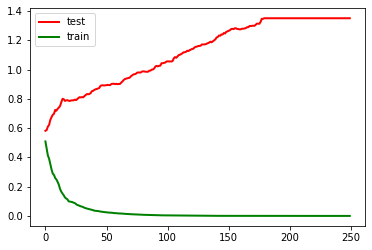

In [69]:
loss_train, loss_test = loss_train_test(X_train, X_test, y_train, y_test, 1)
%matplotlib inline
plt.figure()
plt.plot(loss_test, 'r', linewidth=2)
plt.plot(loss_train, 'g', linewidth=2)
plt.legend(['test', 'train'])

      Iter       Train Loss   Remaining Time 
         1           1.1255           21.07s
         2           1.0043           18.74s
         3           0.9388           18.70s
         4           0.8902           18.24s
         5           0.8324           18.88s
         6           0.7897           18.79s
         7           0.7510           18.37s
         8           0.7200           18.04s
         9           0.7052           17.73s
        10           0.6658           17.71s
        20           0.4941           15.31s
        30           0.3607           14.22s
        40           0.2525           13.37s
        50           0.1863           12.70s
        60           0.1461           11.96s
        70           0.1113           11.27s
        80           0.0902           10.58s
        90           0.0709            9.93s
       100           0.0543            9.29s
       200           0.0050            3.19s


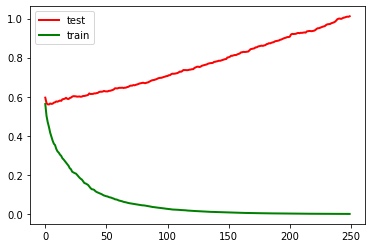

In [70]:
loss_train, loss_test = loss_train_test(X_train, X_test, y_train, y_test, 0.5)
%matplotlib inline
plt.figure()
plt.plot(loss_test, 'r', linewidth=2)
plt.plot(loss_train, 'g', linewidth=2)
plt.legend(['test', 'train'])

      Iter       Train Loss   Remaining Time 
         1           1.2095           19.96s
         2           1.1006           18.11s
         3           1.0240           18.44s
         4           0.9729           18.74s
         5           0.9387           18.37s
         6           0.8948           18.47s
         7           0.8621           18.31s
         8           0.8360           18.07s
         9           0.8171           17.85s
        10           0.7883           17.56s
        20           0.6164           15.50s
        30           0.4933           14.40s
        40           0.4248           14.23s
        50           0.3345           13.63s
        60           0.2760           12.94s
        70           0.2263           12.20s
        80           0.1971           11.38s
        90           0.1693           10.59s
       100           0.1388            9.87s
       200           0.0294            3.22s


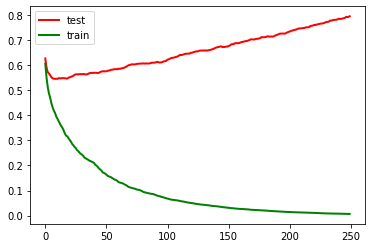

In [71]:
loss_train, loss_test = loss_train_test(X_train, X_test, y_train, y_test, 0.3)
%matplotlib inline
plt.figure()
plt.plot(loss_test, 'r', linewidth=2)
plt.plot(loss_train, 'g', linewidth=2)
plt.legend(['test', 'train'])

      Iter       Train Loss   Remaining Time 
         1           1.3199           21.61s
         2           1.2647           18.98s
         3           1.2170           19.62s
         4           1.1776           19.55s
         5           1.1403           19.06s
         6           1.1106           18.89s
         7           1.0844           19.11s
         8           1.0617           18.84s
         9           1.0410           18.63s
        10           1.0221           18.30s
        20           0.8836           16.13s
        30           0.7840           14.84s
        40           0.7137           14.03s
        50           0.6577           13.51s
        60           0.6029           12.73s
        70           0.5654           11.96s
        80           0.5237           11.30s
        90           0.4911           10.55s
       100           0.4550            9.88s
       200           0.2442            3.20s


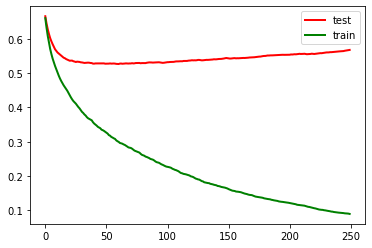

In [72]:
loss_train, loss_test = loss_train_test(X_train, X_test, y_train, y_test, 0.1)
%matplotlib inline
plt.figure()
plt.plot(loss_test, 'r', linewidth=2)
plt.plot(loss_train, 'g', linewidth=2)
plt.legend(['test', 'train'])

      Iter       Train Loss   Remaining Time 
         1           1.2613           21.86s
         2           1.1715           20.68s
         3           1.1009           20.76s
         4           1.0529           20.59s
         5           1.0130           19.96s
         6           0.9740           19.80s
         7           0.9475           19.14s
         8           0.9197           19.00s
         9           0.8979           18.53s
        10           0.8730           18.23s
        20           0.7207           15.67s
        30           0.6055           14.39s
        40           0.5244           13.42s
        50           0.4501           12.65s
        60           0.3908           11.91s
        70           0.3372           11.20s
        80           0.3009           10.54s
        90           0.2603            9.90s
       100           0.2327            9.31s
       200           0.0835            3.28s


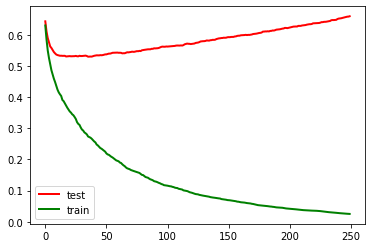

In [73]:
loss_train, loss_test = loss_train_test(X_train, X_test, y_train, y_test, 0.2)
%matplotlib inline
plt.figure()
plt.plot(loss_test, 'r', linewidth=2)
plt.plot(loss_train, 'g', linewidth=2)
plt.legend(['test', 'train'])

In [74]:
with open('week5_2', 'w') as f:
    f.write('overfitting')

In [75]:
with open('week5_3', 'w') as f:
    f.write(str(round(min(loss_test),2)) + ' ' + str(loss_test.index(min(loss_test))+1))

In [78]:
clf = RandomForestClassifier(n_estimators=loss_test.index(min(loss_test))+1, random_state=241)
clf.fit(X_train, y_train)
y_pred = clf.predict_proba(X_test)
with open('week5_4', 'w') as f:
    f.write(str(round(log_loss(y_test, y_pred),2)))
log_loss(y_test, y_pred)

0.54156858119573814